<a href="https://colab.research.google.com/github/NeutrinoExplorer/iQuHACK2025/blob/main/IonQ%20Challenge%20Training/IonQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

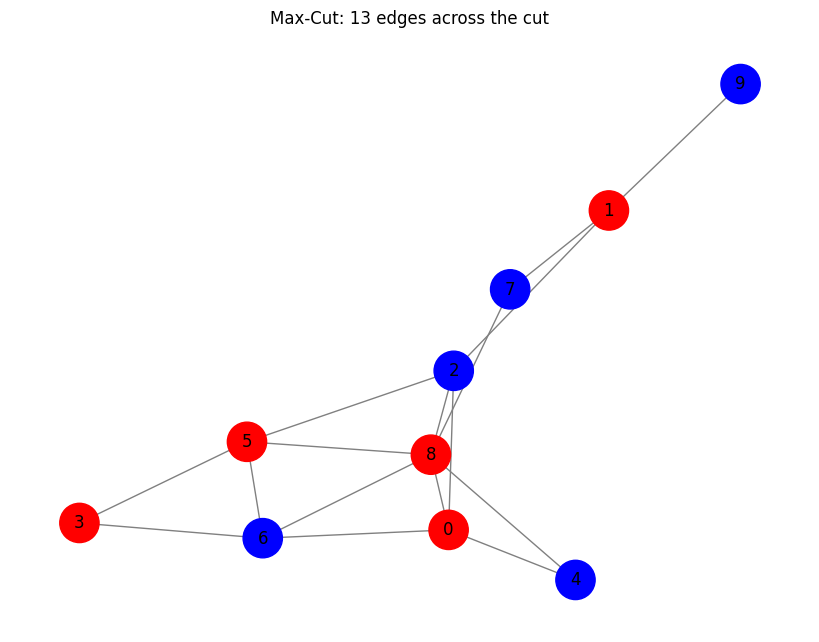

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from itertools import combinations

# Función para resolver el problema Max-Cut usando heurística
def max_cut(graph):
    nodes = list(graph.nodes)
    best_cut = None
    max_edges = 0

    for subset in combinations(nodes, len(nodes) // 2):
        set1 = set(subset)
        set2 = set(nodes) - set1
        edges_cut = sum(1 for u, v in graph.edges if (u in set1 and v in set2) or (v in set1 and u in set2))

        if edges_cut > max_edges:
            max_edges = edges_cut
            best_cut = (set1, set2)

    return best_cut, max_edges

# Generar un grafo de ejemplo
G = nx.erdos_renyi_graph(10, 0.4)  # Grafo aleatorio con 10 nodos y probabilidad de conexión 0.4

# Resolver el problema Max-Cut
best_partition, max_edges = max_cut(G)

# Visualizar el grafo con la partición
plt.figure(figsize=(8, 6))
colors = ["red" if node in best_partition[0] else "blue" for node in G.nodes]
nx.draw(G, with_labels=True, node_color=colors, edge_color="gray", node_size=800, font_size=12)
plt.title(f"Max-Cut: {max_edges} edges across the cut")
plt.show()


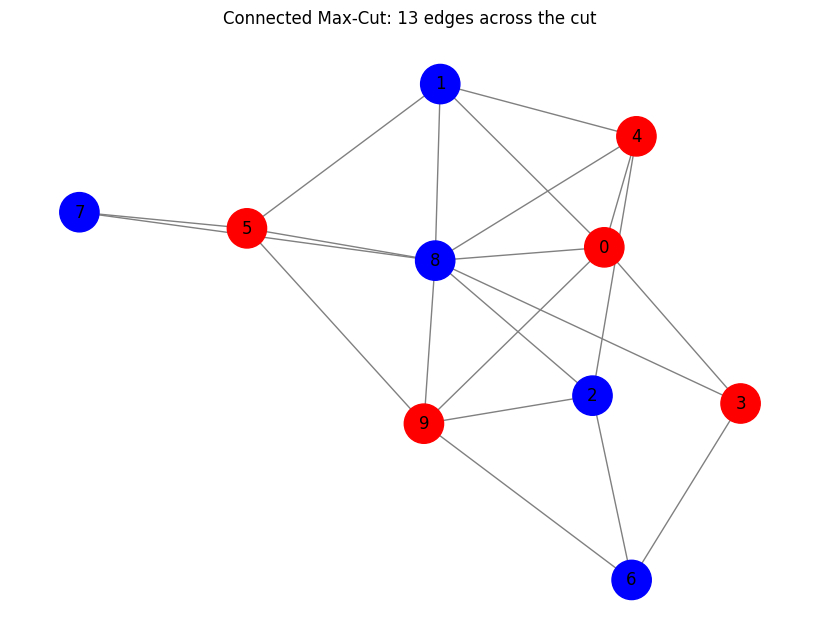

In [ ]:
import networkx as nx  # Librería para manipulación de grafos
import numpy as np
import matplotlib.pyplot as plt  # Para visualización del grafo
from scipy.optimize import minimize
from itertools import combinations  # Para generar todas las formas de particionar nodos

# Función para resolver el problema Max-Cut usando una heurística simple
def max_cut(graph):
    nodes = list(graph.nodes)  # Obtener la lista de nodos
    best_cut = None  # Variable para almacenar la mejor partición encontrada
    max_edges = 0  # Contador del número máximo de aristas que cruzan la partición

    # Generar todas las combinaciones posibles de dividir los nodos en dos subconjuntos
    for subset in combinations(nodes, len(nodes) // 2):
        set1 = set(subset)  # Primer conjunto de nodos
        set2 = set(nodes) - set1  # Segundo conjunto de nodos
        # Contar cuántas aristas cruzan de un grupo a otro
        edges_cut = sum(1 for u, v in graph.edges if (u in set1 and v in set2) or (v in set1 and u in set2))

        # Si esta partición es mejor que la anterior, la guardamos
        if edges_cut > max_edges:
            max_edges = edges_cut
            best_cut = (set1, set2)

    return best_cut, max_edges  # Retornar la mejor partición encontrada y el número de aristas cruzadas

# Función para resolver el Desafío 2: Balancear los grupos
def balanced_max_cut(graph):
    nodes = list(graph.nodes)
    best_cut = None
    max_edges = 0

    # Generar combinaciones posibles asegurando que los grupos sean casi iguales
    for subset in combinations(nodes, len(nodes) // 2):
        set1 = set(subset)
        set2 = set(nodes) - set1
        edges_cut = sum(1 for u, v in graph.edges if (u in set1 and v in set2) or (v in set1 and u in set2))

        # Verificar que los grupos estén equilibrados
        if abs(len(set1) - len(set2)) <= 1 and edges_cut > max_edges:
            max_edges = edges_cut
            best_cut = (set1, set2)

    return best_cut, max_edges

# Función para resolver el Desafío 3: Conectividad dentro de los grupos
def connected_max_cut(graph):
    nodes = list(graph.nodes)
    best_cut = None
    max_edges = 0

    for subset in combinations(nodes, len(nodes) // 2):
        set1 = set(subset)
        set2 = set(nodes) - set1

        # Verificar que cada grupo sea conexo
        subgraph1 = graph.subgraph(set1)
        subgraph2 = graph.subgraph(set2)
        if not nx.is_connected(subgraph1) or not nx.is_connected(subgraph2):
            continue

        edges_cut = sum(1 for u, v in graph.edges if (u in set1 and v in set2) or (v in set1 and u in set2))

        if edges_cut > max_edges:
            max_edges = edges_cut
            best_cut = (set1, set2)

    return best_cut, max_edges

# Generar un grafo aleatorio de 10 nodos con una probabilidad de conexión del 40%
G = nx.erdos_renyi_graph(10, 0.4)

# Resolver los tres desafíos
best_partition1, max_edges1 = max_cut(G)
best_partition2, max_edges2 = balanced_max_cut(G)
best_partition3, max_edges3 = connected_max_cut(G)

# Visualizar los resultados
plt.figure(figsize=(8, 6))
colors = ["red" if node in best_partition3[0] else "blue" for node in G.nodes]
nx.draw(G, with_labels=True, node_color=colors, edge_color="gray", node_size=800, font_size=12)
plt.title(f"Connected Max-Cut: {max_edges3} edges across the cut")
plt.show()


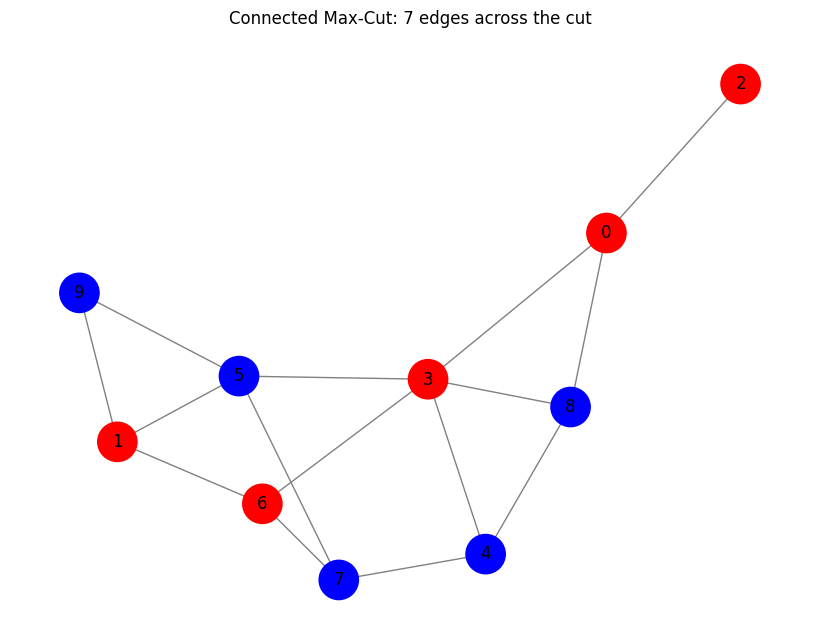

In [ ]:
import networkx as nx  # Librería para manipulación de grafos
import numpy as np
import matplotlib.pyplot as plt  # Para visualización del grafo
from itertools import combinations  # Para generar todas las formas de particionar nodos

# ===================== DESAFÍO 1: MAXIMIZAR LAS CONEXIONES =====================
def max_cut(graph):
    nodes = list(graph.nodes)
    best_cut = None
    max_edges = 0

    for subset in combinations(nodes, len(nodes) // 2):
        set1 = set(subset)
        set2 = set(nodes) - set1
        edges_cut = sum(1 for u, v in graph.edges if (u in set1 and v in set2) or (v in set1 and u in set2))

        if edges_cut > max_edges:
            max_edges = edges_cut
            best_cut = (set1, set2)

    return best_cut, max_edges

# ===================== DESAFÍO 2: BALANCEAR LOS GRUPOS =====================
def balanced_max_cut(graph):
    nodes = list(graph.nodes)
    best_cut = None
    max_edges = 0

    for subset in combinations(nodes, len(nodes) // 2):
        set1 = set(subset)
        set2 = set(nodes) - set1
        edges_cut = sum(1 for u, v in graph.edges if (u in set1 and v in set2) or (v in set1 and u in set2))

        # Verificar que los grupos estén equilibrados
        if abs(len(set1) - len(set2)) <= 1 and edges_cut > max_edges:
            max_edges = edges_cut
            best_cut = (set1, set2)

    return best_cut, max_edges

# ===================== DESAFÍO 3: ASEGURAR CONECTIVIDAD =====================
def connected_max_cut(graph):
    nodes = list(graph.nodes)
    best_cut = None
    max_edges = 0

    for subset in combinations(nodes, len(nodes) // 2):
        set1 = set(subset)
        set2 = set(nodes) - set1

        # Verificar que cada grupo sea conexo
        subgraph1 = graph.subgraph(set1)
        subgraph2 = graph.subgraph(set2)
        if not nx.is_connected(subgraph1) or not nx.is_connected(subgraph2):
            continue

        edges_cut = sum(1 for u, v in graph.edges if (u in set1 and v in set2) or (v in set1 and u in set2))

        if edges_cut > max_edges:
            max_edges = edges_cut
            best_cut = (set1, set2)

    return best_cut, max_edges

# ===================== GENERAR Y RESOLVER GRAFOS =====================
G = nx.erdos_renyi_graph(10, 0.4)  # Generar un grafo aleatorio de 10 nodos

# Resolver cada desafío por separado
best_partition1, max_edges1 = max_cut(G)
best_partition2, max_edges2 = balanced_max_cut(G)
best_partition3, max_edges3 = connected_max_cut(G)

# ===================== VISUALIZAR RESULTADOS =====================
plt.figure(figsize=(8, 6))
colors = ["red" if node in best_partition3[0] else "blue" for node in G.nodes]
nx.draw(G, with_labels=True, node_color=colors, edge_color="gray", node_size=800, font_size=12)
plt.title(f"Connected Max-Cut: {max_edges3} edges across the cut")
plt.show()

In [ ]:
!pip install qiskit
# Install necessary Qiskit packages
!pip install qiskit
!pip install qiskit-aer  # Install the Aer simulator


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 81.4 MB/s eta 0:00:00


In [ ]:
import networkx as nx  # Librería para manipulación de grafos
import numpy as np
import matplotlib.pyplot as plt  # Para visualización del grafo
from itertools import combinations  # Para generar todas las formas de particionar nodos
from qiskit import Aer
from qiskit.optimization import QuadraticProgram
from qiskit.optimization.algorithms import MinimumEigenOptimizer
from qiskit.utils import algorithm_globals
from qiskit.algorithms import QAOA
from qiskit.algorithms.optimizers import COBYLA

# ===================== DESAFÍO 1: MAXIMIZAR LAS CONEXIONES (QAOA) =====================
def max_cut_qaoa(graph):
    qp = QuadraticProgram()
    for node in graph.nodes:
        qp.binary_var(str(node))

    for u, v in graph.edges:
        qp.minimize_linear([(str(u), str(v), -1)])

    backend = Aer.get_backend("qasm_simulator")
    qaoa = QAOA(optimizer=COBYLA(), reps=2)
    optimizer = MinimumEigenOptimizer(qaoa)
    result = optimizer.solve(qp)

    cut = [int(result.x[i]) for i in range(len(graph.nodes))]
    set1 = {node for i, node in enumerate(graph.nodes) if cut[i] == 0}
    set2 = set(graph.nodes) - set1

    return set1, set2

# ===================== DESAFÍO 2: BALANCEAR LOS GRUPOS =====================
def balanced_max_cut_qaoa(graph):
    nodes = list(graph.nodes)
    best_cut = None
    max_edges = 0

    for subset in combinations(nodes, len(nodes) // 2):
        set1 = set(subset)
        set2 = set(nodes) - set1
        edges_cut = sum(1 for u, v in graph.edges if (u in set1 and v in set2) or (v in set1 and u in set2))

        if abs(len(set1) - len(set2)) <= 1 and edges_cut > max_edges:
            max_edges = edges_cut
            best_cut = (set1, set2)

    return best_cut

# ===================== DESAFÍO 3: ASEGURAR CONECTIVIDAD =====================
def connected_max_cut_qaoa(graph):
    nodes = list(graph.nodes)
    best_cut = None
    max_edges = 0

    for subset in combinations(nodes, len(nodes) // 2):
        set1 = set(subset)
        set2 = set(nodes) - set1

        subgraph1 = graph.subgraph(set1)
        subgraph2 = graph.subgraph(set2)
        if not nx.is_connected(subgraph1) or not nx.is_connected(subgraph2):
            continue

        edges_cut = sum(1 for u, v in graph.edges if (u in set1 and v in set2) or (v in set1 and u in set2))

        if edges_cut > max_edges:
            max_edges = edges_cut
            best_cut = (set1, set2)

    return best_cut

# ===================== GENERAR Y RESOLVER GRAFOS =====================
G = nx.erdos_renyi_graph(10, 0.4)  # Generar un grafo aleatorio de 10 nodos

# Resolver cada desafío con QAOA
best_partition1 = max_cut_qaoa(G)
best_partition2 = balanced_max_cut_qaoa(G)
best_partition3 = connected_max_cut_qaoa(G)

# ===================== VISUALIZAR RESULTADOS =====================
def visualize(graph, partition, title):
    plt.figure(figsize=(8, 6))
    colors = ["red" if node in partition[0] else "blue" for node in graph.nodes]
    nx.draw(graph, with_labels=True, node_color=colors, edge_color="gray", node_size=800, font_size=12)
    plt.title(title)
    plt.show()

visualize(G, best_partition1, "QAOA Max-Cut")
visualize(G, best_partition2, "QAOA Balanced Max-Cut")
visualize(G, best_partition3, "QAOA Connected Max-Cut")


ImportError: cannot import name 'Aer' from 'qiskit' (/usr/local/lib/python3.11/dist-packages/qiskit/__init__.py)